# Week 7 - Visualization & Wrangling
---

Mentoring Session - Job Preparation Program - Pacmann AI

In [1]:
# Please load this library
import numpy as np
import pandas as pd
from datetime import date,datetime

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Task Descriptions
---

- You are given a dataset of Online Store Retail Orders .
- The dataset contains 2 tables: `orders` and `product supplier`. You can join the tables on `Product ID`
- Your task is answer business questions below.
- But the data is not clean. Please **clean the data** by :
  1. Removing the unconsistency in `Customer Status`
  2. Dropping data with missing value (if any)
  3. Drop duplicates data (if any)

- Then, please **answer these business questions and give recommendations (you can also give some insights if you find something interesting)**:
  1. Which product has the highest profit percentage? The profit percentage can be calculated as:
  $$
  \text{Profit Percentage} = \cfrac
  {(\text{Unit Price - Cost Price per Unit})}
  {\text{Cost Price per Unit}} \cdot 100\%
  $$
  
  e.g. `unit price = 2.500`, `cost per unit price = 2.000`, <br>then `profit percentage = ((2.500 - 2.000)/2.000) * 100% = 500/2.000 * 100% = 25%`

  2. How much profit obtained month over month of every year?
  3. Does the lower the cost, the higher the profit? Does the cheaper the price the more people buy?
  4. Show the top 3 of the most favorite product in the latest year
  5. Find the tendency and the longest of order-to-delivery length for every month in the latest year (please use a proper measure of central tendency). Order-to-delivery length is defined as how much days was taken to deliver from order date of customer.
  6. The owner of store want to give discount promo. But, the promo is only for the active loyal customer. Help the owner find the unique `customer ID` of loyal customers and show the proportion of their status. Definition of active loyal customer is the customer who order more than 3 times and order in 3 latest months.
- **Hint**: data of customer status may be updated and different for every single order. You can use the maximum status level of the customer for question 6 (1: Silver, 2: Gold, 3: Platinum).
- **Note**: the month or year of order is defined from `Date Order`.

**Dataset**
- Please download the dataset in [here](https://drive.google.com/drive/folders/13QqqYUj8P06dXOUrtiea7K4MDendVNU5?usp=sharing)
- The actual data source is [here](https://www.kaggle.com/datasets/gabrielsantello/wholesale-and-retail-orders-dataset)

# Expected Output

The output should be:

**Question 1**

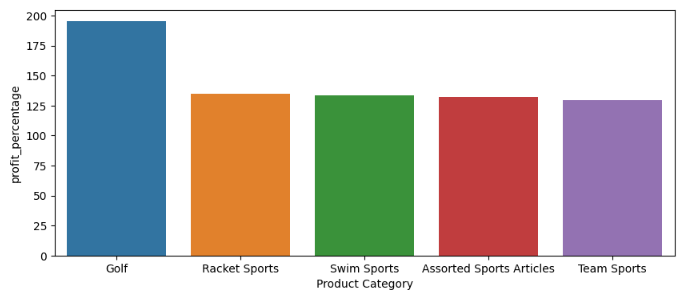


```
Insert your interpretation of visualization
```
<br>


**Question 2**

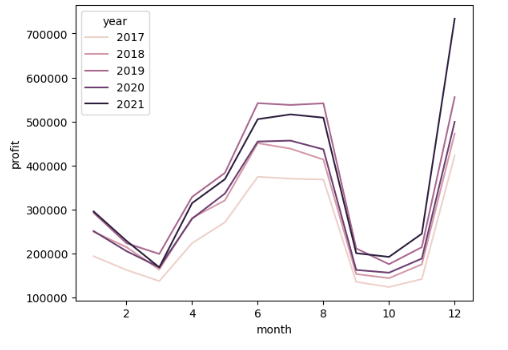

```
Insert your interpretation of visualization
```
<br>


**Question 3**

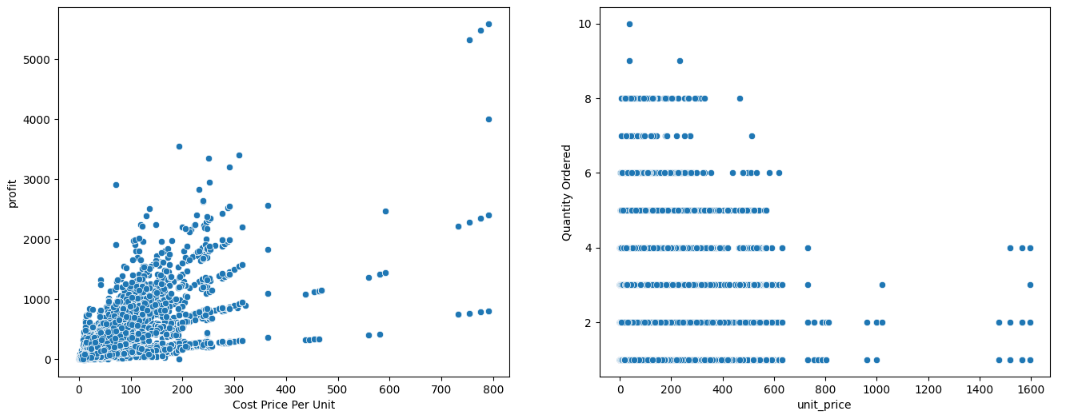

```
Insert your interpretation of visualization
```
<br>



**Question 4**

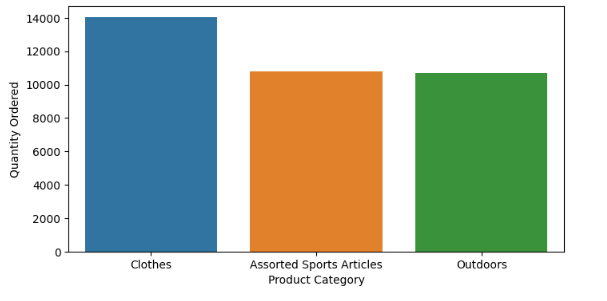

```
Insert your interpretation of visualization
```
<br>



**Question 5**

The order-to-delivery length of every month in the latest year:

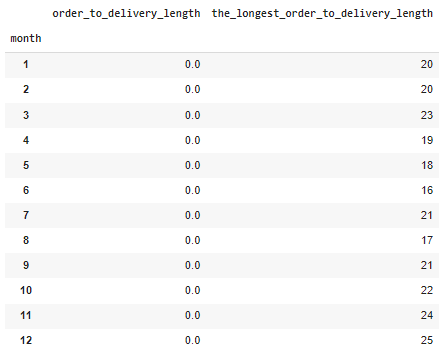

```
Insert your insights
```

<br>

**Question 6**
```
Total active loyal customers: 103
```

Customer ID of active loyal customer:

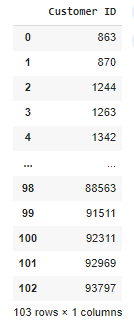
<br>

Proportion of active loyal customer status:

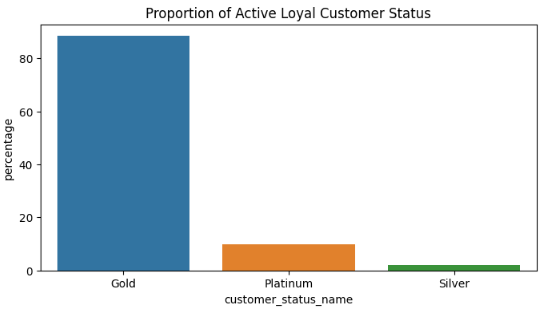

```
Insert your interpretation of visualization
```

# Answer
---


- Provide the code for getting the expected output

In [2]:
# Write your code in here
# Provide your code with sufficient comment on the wrangling processes

## Read and Merge Dataset

In [3]:
# Read the data
orders = pd.read_csv('orders.csv')
product_supplier = pd.read_csv('product_supplier.csv')

# Merge the data on Product ID
retail_orders = orders.merge(product_supplier, how = 'inner', on = 'Product ID')

# Show merge dataset result
print('Shape:', retail_orders.shape)
retail_orders.head()

Shape: (185013, 16)


,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.7,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
1,38508,Silver,11-Mar-17,11-Mar-17,123079335,220101400106,1,46.3,20.7,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
2,17556,Gold,09-Jun-17,09-Jun-17,123073344,220101400106,3,138.9,20.7,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
3,51989,Gold,16-Jun-17,16-Jun-17,123011653,220101400106,2,92.6,20.7,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
4,48644,GOLD,12-Dec-17,24-Dec-17,123101767,220101400106,6,277.8,20.7,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963


## Rename Columns

In [4]:
# Rename Columns
retail_orders.columns = ['customer_id', 'customer_status', 'order_date', 'delivery_date', 'order_id', 'product_id', 'quantity_ordered',
                         'total_price_perOrder', 'cost_price_perUnit', 'product_line', 'product_category', 'product_group', 'product_name',
                         'supplier_country', 'supplier_name', 'supplier_id']

# Check new columns
retail_orders.head(2)

,customer_id,customer_status,order_date,delivery_date,order_id,product_id,quantity_ordered,total_price_perOrder,cost_price_perUnit,product_line,product_category,product_group,product_name,supplier_country,supplier_name,supplier_id
0,579,Silver,01-Jan-17,07-Jan-17,123002578,220101400106,2,92.6,20.7,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
1,38508,Silver,11-Mar-17,11-Mar-17,123079335,220101400106,1,46.3,20.7,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963


## Adjust dtypes

In [5]:
# Check dtypes
retail_orders.dtypes

customer_id               int64
customer_status          object
order_date               object
delivery_date            object
order_id                  int64
product_id                int64
quantity_ordered          int64
total_price_perOrder    float64
cost_price_perUnit      float64
product_line             object
product_category         object
product_group            object
product_name             object
supplier_country         object
supplier_name            object
supplier_id               int64
dtype: object

In [6]:
# Change order_date and delivery_date dtype
retail_orders.order_date = pd.to_datetime(retail_orders.order_date, dayfirst=True)
retail_orders.delivery_date = pd.to_datetime(retail_orders.delivery_date, dayfirst=True)

C:\Users\aflah\AppData\Local\Temp\ipykernel_37424\2307611921.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_orders.order_date = pd.to_datetime(retail_orders.order_date, dayfirst=True)
C:\Users\aflah\AppData\Local\Temp\ipykernel_37424\2307611921.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_orders.delivery_date = pd.to_datetime(retail_orders.delivery_date, dayfirst=True)


In [7]:
# Check new dtypes
retail_orders.dtypes

customer_id                      int64
customer_status                 object
order_date              datetime64[ns]
delivery_date           datetime64[ns]
order_id                         int64
product_id                       int64
quantity_ordered                 int64
total_price_perOrder           float64
cost_price_perUnit             float64
product_line                    object
product_category                object
product_group                   object
product_name                    object
supplier_country                object
supplier_name                   object
supplier_id                      int64
dtype: object

## Cleaning Data

But the data is not clean. Please clean the data by :

1. Removing the unconsistency in Customer Status
2. Dropping data with missing value (if any)
3. Drop duplicates data (if any)

### Removing Unconsistency in Customer Status

In [8]:
# Check the values in Customer Status
retail_orders.customer_status.unique()

array(['Silver', 'Gold', 'GOLD', 'SILVER', 'Platinum', 'PLATINUM'],
      dtype=object)

In [9]:
# Aligning the values
retail_orders.customer_status = retail_orders.customer_status.str.title()

# Check new unique values
retail_orders.customer_status.unique()

array(['Silver', 'Gold', 'Platinum'], dtype=object)

### Dropping data with missing value (if any)

In [10]:
# Check null
retail_orders.isna().sum()

customer_id             0
customer_status         0
order_date              0
delivery_date           0
order_id                0
product_id              0
quantity_ordered        0
total_price_perOrder    0
cost_price_perUnit      0
product_line            0
product_category        0
product_group           0
product_name            0
supplier_country        0
supplier_name           0
supplier_id             0
dtype: int64


Seems like the data doesn't have any missing values, so we can proceed to the next step

### Drop duplicates data (if any)

In [11]:
# Check duplicates
retail_orders.duplicated().sum()

0

The data doesn't have any duplicates, so we can answer these business questions 

## Answer these business questions

### 1. Which product has the highest profit percentage?

The profit percentage can be calculated as:
  $$
  \text{Profit Percentage} = \cfrac
  {(\text{Unit Price - Cost Price per Unit})}
  {\text{Cost Price per Unit}} \cdot 100\%
  $$

In [12]:
# Calculate Unit Price
unit_price = retail_orders['total_price_perOrder'] / retail_orders['quantity_ordered']

# Create new columns for Unit Price
retail_orders.insert(7, 'unit_price', unit_price.round(2))

# Check new dataframe
retail_orders.head(2)

,customer_id,customer_status,order_date,delivery_date,order_id,product_id,quantity_ordered,unit_price,total_price_perOrder,cost_price_perUnit,product_line,product_category,product_group,product_name,supplier_country,supplier_name,supplier_id
0,579,Silver,2017-01-01,2017-01-07,123002578,220101400106,2,46.3,92.6,20.7,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
1,38508,Silver,2017-03-11,2017-03-11,123079335,220101400106,1,46.3,46.3,20.7,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963


In [13]:
# Calculate Profit Percentage
profit_percentage = (retail_orders['unit_price'] - retail_orders['cost_price_perUnit'])*100 / retail_orders['cost_price_perUnit']

# Create new columns for Profit Percentage
retail_orders.insert(10, 'profit_percentage', profit_percentage.round(2))

# Check new dataframe
retail_orders.head(2)

,customer_id,customer_status,order_date,delivery_date,order_id,product_id,quantity_ordered,unit_price,total_price_perOrder,cost_price_perUnit,profit_percentage,product_line,product_category,product_group,product_name,supplier_country,supplier_name,supplier_id
0,579,Silver,2017-01-01,2017-01-07,123002578,220101400106,2,46.3,92.6,20.7,123.67,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
1,38508,Silver,2017-03-11,2017-03-11,123079335,220101400106,1,46.3,46.3,20.7,123.67,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963


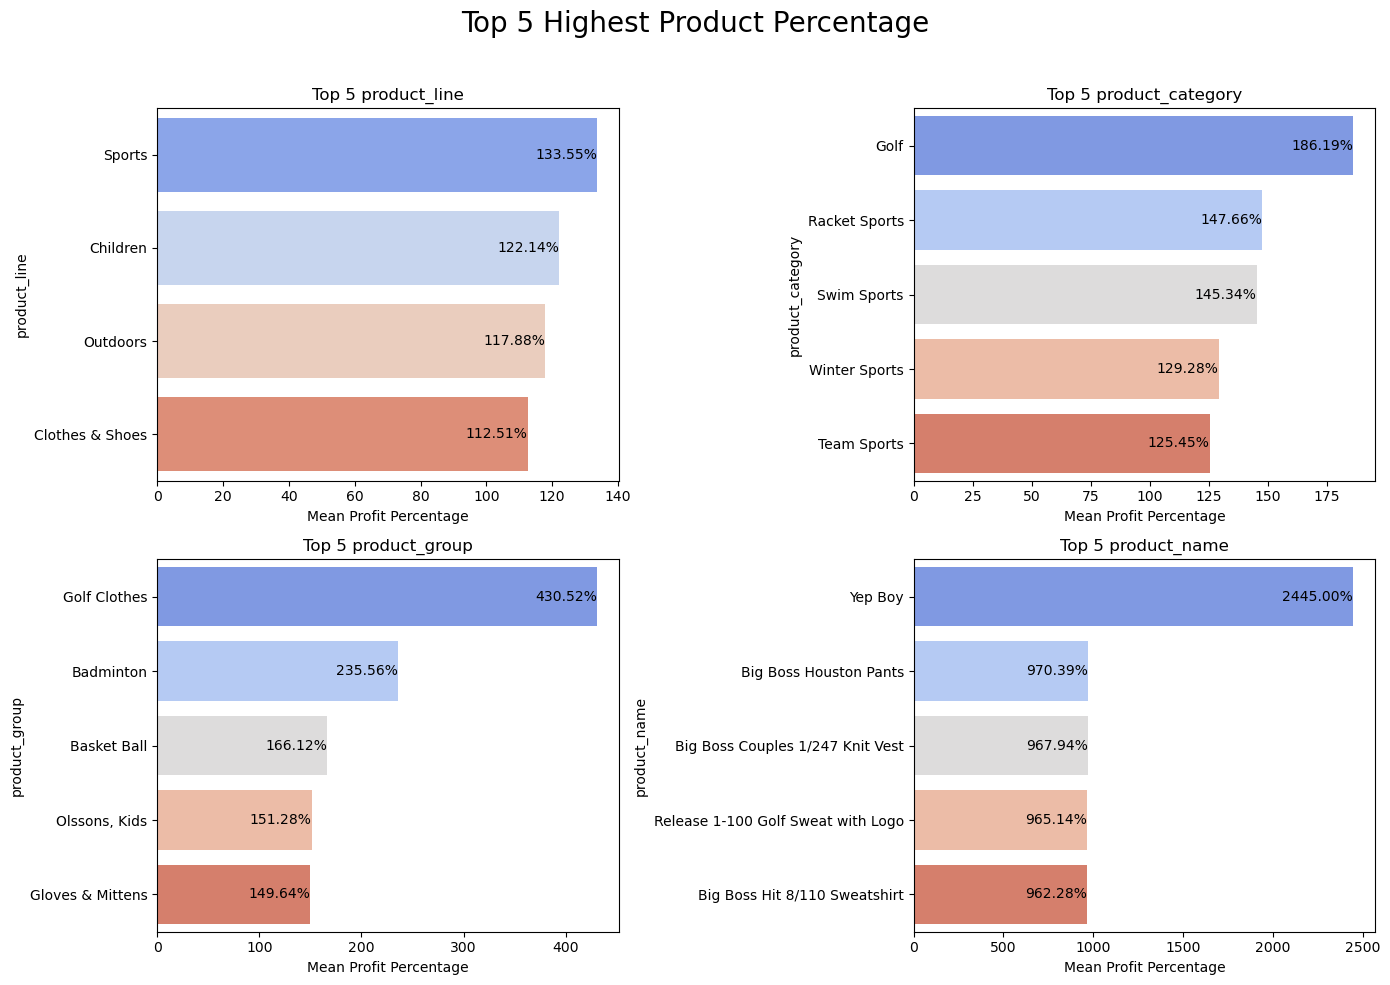

In [14]:
# Viz the top 5 highest product percentage

## List of column names to be grouped
columns_to_group = ['product_line', 'product_category', 'product_group', 'product_name']

## Set the size of the plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))  

## Set sup-title
fig.suptitle('Top 5 Highest Product Percentage', fontsize=20)

## Loop through each column name
for i, column in enumerate(columns_to_group, 0):
    ### Calculate the mean profit percentage based on the column group and take the top 5
    top_5 = retail_orders.groupby(column)['profit_percentage'].mean().sort_values(ascending=False).head(5)
    
    ### Plotting
    sns.barplot(x=top_5.values, y=top_5.index, palette="coolwarm", ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(f"Top 5 {column}")
    ax[i // 2, i % 2].set_xlabel("Mean Profit Percentage")
    ax[i // 2, i % 2].set_ylabel(column)
    
    ### Adding value labels
    for index, value in enumerate(top_5.values):
        ax[i // 2, i % 2].text(value, index, f'{value:.2f}%', ha='right', va='center')  # Adjust 'left' or 'right' for positioning

## Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Add some space at the top for the sup-title

## Show the plots
plt.show()

**INSIGHTS and RECOMMENDATIONS**

**Sports Product Line:**
- The high mean profit percentage for the sports product line indicates that it might be beneficial for the company to focus more on marketing and expanding this category.
- Further analysis could involve identifying the specific products within the sports category that are driving the high profits, allowing the company to allocate resources more effectively.

**Golf Category:**
- The exceptionally high mean profit percentage for golf-related products suggests that there may be a strong demand for these items among customers.
- To capitalize on this trend, the company could consider introducing new golf products or expanding its existing golf product line.

**Golf Clothes Product Group:**
- The significant profitability of golf clothing items presents an opportunity for the company to further develop and promote this product group.
- Investing in innovative designs, high-quality materials, and targeted marketing campaigns for golf clothing could attract more customers and drive sales.

**Yep Boy Product:**
- The exceptionally high mean profit percentage for the "Yep Boy" product indicates that it is a standout performer for the company.
- Analyzing the characteristics of this product, such as its unique features, pricing strategy, and target audience, can provide insights into why it is so successful.

**Customer Segmentation:**
- Understanding the demographics and preferences of customers who purchase these high-profit products can inform targeted marketing strategies.
- Analyzing customer data to identify trends, such as geographic location, age group, or purchasing behavior, can help tailor promotional efforts to specific customer segments.

**Competitive Analysis:**
- Investigating competitors' offerings in the most profitable product categories can provide insights into market trends and potential areas for differentiation.
- Identifying gaps in the market or areas where the company can outperform competitors can inform product development and marketing strategies.

By delving into these specific areas of analysis, the company can gain a deeper understanding of its most profitable product lines, categories, groups, and individual products. This insight can guide strategic decision-making processes, enabling the company to capitalize on its strengths and seize opportunities for growth in the market.
for growth in the market.


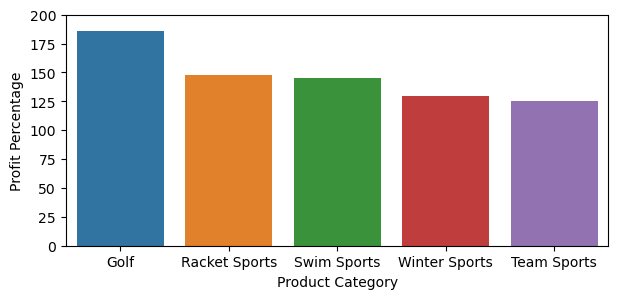

In [15]:
# As Expected Output

## Grouping
top_5_product_cat = retail_orders.groupby('product_category')['profit_percentage'].mean().sort_values(ascending=False).head(5).reset_index()

## Viz
### Set fig size
plt.figure(figsize=(7,3))

### Barplot
sns.barplot(top_5_product_cat, x='product_category', y='profit_percentage', palette='tab10')

### Set label
plt.xlabel('Product Category')
plt.ylabel('Profit Percentage')

### Set y-limit
plt.ylim(0, 200)

### Show viz
plt.show()

### 2. How much profit obtained month over month of every year?

In [16]:
# Create new columns for day, month and year
## Extrace order_date to day, month and year
day_order = retail_orders['order_date'].dt.day
month_order = retail_orders['order_date'].dt.month
year_order = retail_orders['order_date'].dt.year

## Create new columns for day_order, month_order and delivery_order
retail_orders.insert(3, 'day_order', day_order)
retail_orders.insert(4, 'month_order', month_order)
retail_orders.insert(5, 'year_order', year_order)


# Create new column for profit
## Calculate profit
profit = retail_orders['total_price_perOrder'] - (retail_orders['cost_price_perUnit']*retail_orders['quantity_ordered'])

## Create new column
retail_orders.insert(13, 'profit', profit)


# Check new dataframe
retail_orders.head(2)

,customer_id,customer_status,order_date,day_order,month_order,year_order,delivery_date,order_id,product_id,quantity_ordered,...,cost_price_perUnit,profit,profit_percentage,product_line,product_category,product_group,product_name,supplier_country,supplier_name,supplier_id
0,579,Silver,2017-01-01,1,1,2017,2017-01-07,123002578,220101400106,2,...,20.7,51.2,123.67,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
1,38508,Silver,2017-03-11,11,3,2017,2017-03-11,123079335,220101400106,1,...,20.7,25.6,123.67,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963


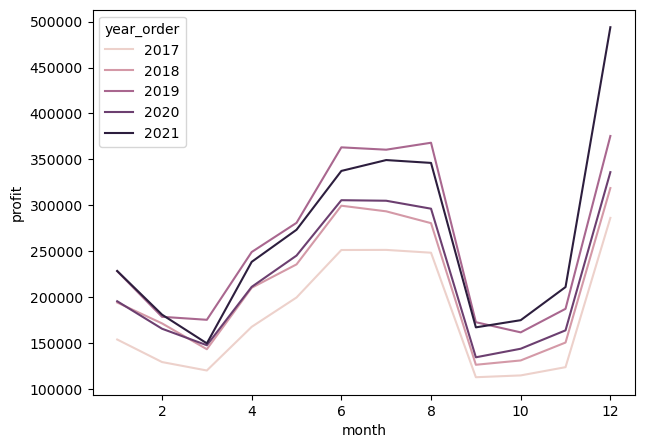

In [17]:
# Grouping
profit_month_ofYear = retail_orders.groupby(['year_order', 'month_order'])['profit'].sum().reset_index()

# Visualize profit obtained month over month of every year
## Set figure
plt.figure(figsize=(7,5))
## lineplot
sns.lineplot(profit_month_ofYear, x='month_order', y='profit', hue='year_order')
## Set label
plt.xlabel('month')
## Show the plots
plt.show()

**INSIGHTS**

**Trend Analysis:**
- The total profit shows a general increasing trend over the years, with fluctuations observed within each year.
- Profit tends to peak during mid to late-year months, suggesting potential seasonal patterns or increased consumer spending during specific periods.

**Yearly Profit Distribution:**
- The year 2021 stands out as the most profitable year, with a substantial increase in profit compared to previous years.
- Profit appears to have experienced steady growth from 2017 to 2020 before experiencing a significant surge in 2021.

**Monthly Profit Variation:**
- Within each year, profit varies across different months, with some months generating higher profits than others.
- The months of June and July consistently appear to be the most profitable across multiple years, indicating potential seasonal factors or promotional events during these periods.

**Seasonal Trends:**
- The summer months (June to August) consistently exhibit higher profits compared to other seasons, suggesting increased consumer activity during the warmer months.
- Companies can capitalize on these seasonal trends by implementing targeted marketing campaigns or launching new products tailored to summer preferences.

**Year-end Peaks:**
- December often emerges as a peak month for profit, possibly due to holiday season shopping and year-end promotions.
- Businesses can leverage this trend by offering special discounts, incentives, or exclusive deals to attract holiday shoppers and maximize year-end profits.

**Implications for Business Strategy:**
- Understanding the seasonal variations and monthly profit trends can help businesses plan their inventory management, marketing strategies, and promotional activities more effectively.
- By identifying peak months and leveraging seasonal trends, companies can optimize resource allocation, improve sales performance, and enhance overall profitability.

By analyzing the profit data and identifying these key insights, businesses can make informed decisions and implement strategic initiatives to drive growth, maximize profits, and stay competitive in the market.


### 3. Does the lower the cost, the higher the profit? Does the cheaper the price the more people buy?

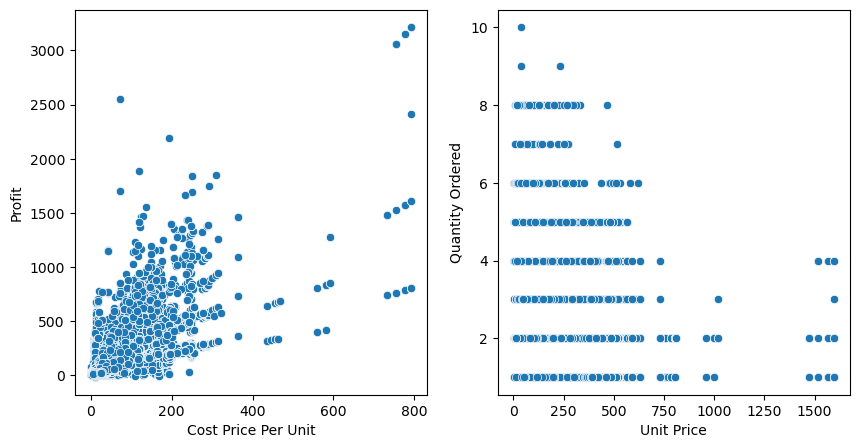

In [18]:
# Create correlation viz for cost vs profit and price vs quantity
## Set fig
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

## Cost vs Profit
### Make viz
sns.scatterplot(data=retail_orders, x='cost_price_perUnit', y='profit', ax=ax[0])
### Set label
ax[0].set_xlabel('Cost Price Per Unit')
ax[0].set_ylabel('Profit')

## Price vs Quantity
### Make viz
sns.scatterplot(data=retail_orders, x='unit_price', y='quantity_ordered', ax=ax[1])
### Set label
ax[1].set_xlabel('Unit Price')
ax[1].set_ylabel('Quantity Ordered')

## Show the plots
plt.show()

In [19]:
# Find r values
r1 = np.corrcoef(retail_orders['cost_price_perUnit'], retail_orders['profit'])[1,0]
r2 = np.corrcoef(retail_orders['unit_price'], retail_orders['quantity_ordered'])[1,0]

print('cost_price_perUnit vs profit', r1.round(3))
print('unit_price vs quantity_ordered', r2)

cost_price_perUnit vs profit 0.737
unit_price vs quantity_ordered 0.0035832067102152016


**INSIGHTS**

1. **Cost Price per Unit vs Profit:**
   - There is a strong positive correlation between the cost price per unit and the profit, with a correlation coefficient (r) of approximately 0.737.
   - This indicates that as the cost price per unit increases, the profit also tends to increase. It suggests that products with higher costs can yield higher profits, assuming other factors remain constant.
   - Businesses should carefully consider pricing strategies and cost management to maximize profitability. They may explore options to optimize production costs while maintaining product quality to improve profit margins.

2. **Unit Price vs Quantity Ordered:**
   - There is a very weak positive correlation between the unit price and the quantity ordered, with a correlation coefficient (r) of approximately 0.004.
   - This suggests that there is almost no linear relationship between the unit price of a product and the quantity ordered. In other words, changes in unit price do not significantly impact the quantity ordered.
   - Businesses should focus on other factors, such as marketing strategies, product quality, and customer preferences, to influence the quantity ordered. Pricing adjustments alone may not lead to substantial changes in purchase quantities.
   - It may be beneficial for businesses to conduct further analysis to understand the factors driving customer purchasing behavior and tailor their strategies accordingly to increase sales volumes.

Overall, these insights provide valuable information for businesses to optimize their pricing and sales strategies, improve profitability, and enhance customer satisfaction.


### 4. Show the top 3 of the most favorite product in the latest year

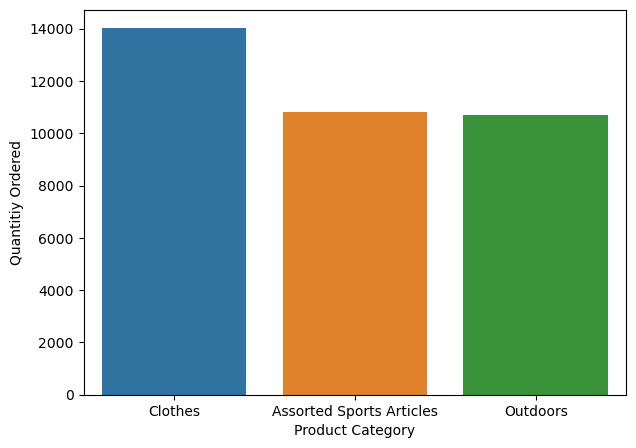

In [20]:
# Retail order in the latest year
retail_orders_latestYear = retail_orders[retail_orders['year_order'] == retail_orders['year_order'].max()]

# Grouping
top_3_product = retail_orders_latestYear.groupby(['product_category'])['quantity_ordered'].sum().sort_values(ascending=False).head(3).reset_index()

# Make visualization for top 3 of the most favorite product in the latest year
## Set figure
plt.figure(figsize=(7,5))
## Barplot
sns.barplot(top_3_product, x='product_category', y='quantity_ordered', palette='tab10')
## Set label
plt.xlabel('Product Category')
plt.ylabel('Quantitiy Ordered')
## Show plot
plt.show()

**INSIGHTS**

1. **Clothes:**
   - The "Clothes" category has the highest quantity ordered, with 14,021 units.
   - This indicates that clothes are one of the most popular product categories among customers.
   - Businesses operating in the clothing industry may consider expanding their product lines or marketing efforts to capitalize on this demand.
   - Strategies such as introducing new clothing designs, offering promotions, or improving online and offline shopping experiences can help attract more customers and increase sales further.

2. **Assorted Sports Articles:**
   - The "Assorted Sports Articles" category follows closely behind clothes, with 10,806 units ordered.
   - This suggests that sports-related products are also popular among customers.
   - Businesses catering to sports enthusiasts may explore opportunities to diversify their product offerings, enhance product quality, or collaborate with sports organizations to attract more customers.
   - Marketing campaigns targeting sports enthusiasts, such as sponsoring sports events or partnering with athletes, can also help increase brand visibility and drive sales in this category.

3. **Outdoors:**
   - The "Outdoors" category ranks third in terms of quantity ordered, with 10,704 units.
   - This category likely includes products such as camping gear, hiking equipment, and outdoor apparel.
   - The demand for outdoor-related products indicates a potential market for outdoor enthusiasts and adventurers.
   - Businesses operating in this category may focus on promoting outdoor activities, highlighting the durability and functionality of their products, and expanding their product range to meet diverse customer needs.
   - Engaging in outdoor community events, collaborating with outdoor influencers, or leveraging social media platforms to showcase outdoor adventures can help attract customers and boost sales in this category.

Overall, these insights provide valuable information for businesses to understand customer preferences, optimize inventory management, and tailor their marketing strategies to drive sales and enhance customer satisfaction in each product category.


### 5. Find the tendency and the longest of order-to-delivery length for every month in the latest year (please use a proper measure of central tendency). Order-to-delivery length is defined as how much days was taken to deliver from order date of customer.

In [21]:
# Create new columns for extrace the order_date
## Extrace order_date to day, month and year
day_delivery = retail_orders['delivery_date'].dt.day
month_delivery = retail_orders['delivery_date'].dt.month
year_delivery = retail_orders['delivery_date'].dt.year

## Create new columns for day_order, month_order and delivery_order
retail_orders.insert(7, 'day_delivery', day_order)
retail_orders.insert(8, 'month_delivery', month_order)
retail_orders.insert(9, 'year_delivery', year_order)

# Check if there are different order and delivery months
m_order_delivery = retail_orders['month_delivery'] - retail_orders['month_order']
m_order_delivery.sum()

0

It seems that there aren't any different months between the order and delivery months.

In [22]:
# Create new columns order_to_delivery
## Calculate length
order_to_delivery_length = (retail_orders['delivery_date'] - retail_orders['order_date']).dt.days
order_to_delivery_length

## Create new column
retail_orders.insert(10, 'order_to_delivery_length', order_to_delivery_length)

In [23]:
# Lastest Year
retail_orders_latestYear = (retail_orders[retail_orders['year_delivery'] == retail_orders['year_delivery'].agg(max)]).copy()

# Grouping by month to see the_longest_order_to_delivery_length
order_to_delivery_length_min_max = (
    retail_orders_latestYear
    .groupby('month_delivery')['order_to_delivery_length']
    .agg([min, max])
)

# Rename Column
order_to_delivery_length_min_max.columns = ['order_to_delivery_length', 'the_longest_order_to_delivery_length']

# Show the result
order_to_delivery_length_min_max

,order_to_delivery_length,the_longest_order_to_delivery_length
month_delivery,,
1,0,20
2,0,20
3,0,23
4,0,19
5,0,18
6,0,16
7,0,21
8,0,17
9,0,21


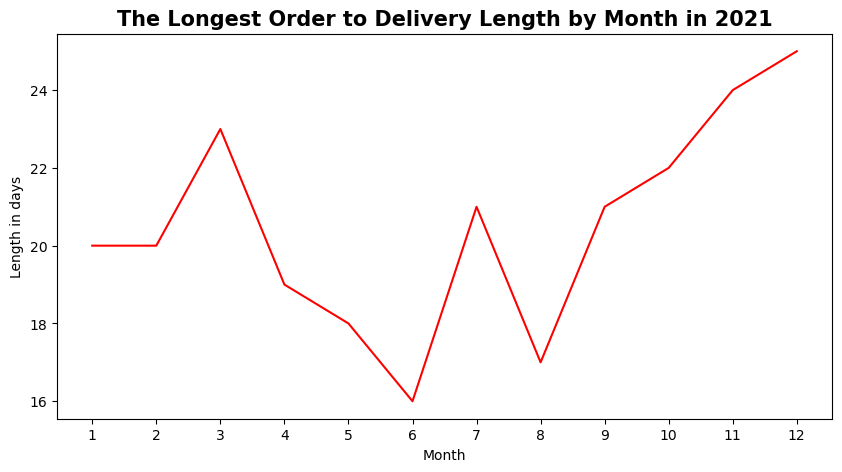

In [24]:
# Viz the_longest_order_to_delivery_length
## Set figure
plt.figure(figsize=(10,5))

## lineplot
sns.lineplot(order_to_delivery_length_min_max, x='month_delivery', y='the_longest_order_to_delivery_length', color='red')

## Set label
plt.xlabel('Month')
plt.ylabel('Length in days')

## Set xticks
plt.xticks(order_to_delivery_length_min_max.index.tolist())

## Set title
plt.title('The Longest Order to Delivery Length by Month in 2021', fontsize=15, weight='bold')
    
## Show the plot
plt.show()

**INSIGHTS**
- **From Month 2 to Month 3 (February to March):** There is an increase in the longest order to delivery length, with Month 3 (March) recording the highest at 23 days.
- **From Month 3 to Month 6 (March to June):** There is a consistent decrease in the longest order to delivery length, reaching its lowest point in Month 6 (June) at 16 days.
- **From Month 6 to Mont7 9 (June tJulyer):** There isnht increase in the longest order to delivery length, peakiiin Month 7 (July) t125 day
- **From Month 7 to Month 8 (July to August):** There is a decrease in the longest order to delivery length, reaching its lowest point in Month 8 (August) at 17 days.
- **From Month 8 to Month 12 (August to December):** There is a huge increase in the longest order to delivery length, peaking again in Month 12 (December) at 25 days.s. 16 days

These insights reveal variations in the longest order-to-delivery length across different months. December experienced the highest longest delivery time, indicating potential challenges or disruptions during the holiday season. On the othe June, July, and August demonstrated the lowest longest delivery time, suggesting efficient delivery processes or lower order volumes during tese months.


### 6. The owner of store want to give discount promo. But, the promo is only for the active loyal customer. Help the owner find the unique customer ID of loyal customers and show the proportion of their status. Definition of active loyal customer is the customer who order more than 3 times and order in 3 latest months.

**Hint**: data of customer status may be updated and different for every single order. You can use the maximum status level of the customer for question 6 (1: Silver, 2: Gold, 3: Platinum).

In [25]:
# Filter groups based on the number of orders above 3 in 3 latest months
count_latest_3_months = retail_orders['month_order'].max() - 3
latest_3_months = retail_orders_latestYear[retail_orders_latestYear['month_order'] > count_latest_3_months]
customer_id_counts = pd.DataFrame(latest_3_months.groupby(['customer_id', 'customer_status'])['customer_id'].count())
customer_id_counts.columns = ['repeated_order']
loyal_customer = customer_id_counts[customer_id_counts['repeated_order'] > 3]

# Display the result
loyal_customer

,,repeated_order
customer_id,customer_status,
870,Gold,4
1244,Gold,5
8460,Silver,4
11181,Silver,4
11543,Gold,4
14194,Gold,4
14277,Gold,4
25455,Gold,4
33262,Gold,4


There are customer as requested who can get a discount promo

In [26]:
# Repeated by customer status count
customer_id_status = pd.DataFrame(latest_3_months.groupby(['customer_status'])['customer_id'].count())
customer_id_status.columns = ['total_customer']
loyal_customer_status = customer_id_status[customer_id_status['total_customer'] >= 3]
loyal_customer_status

,total_customer
customer_status,
Gold,5889
Platinum,263
Silver,6112


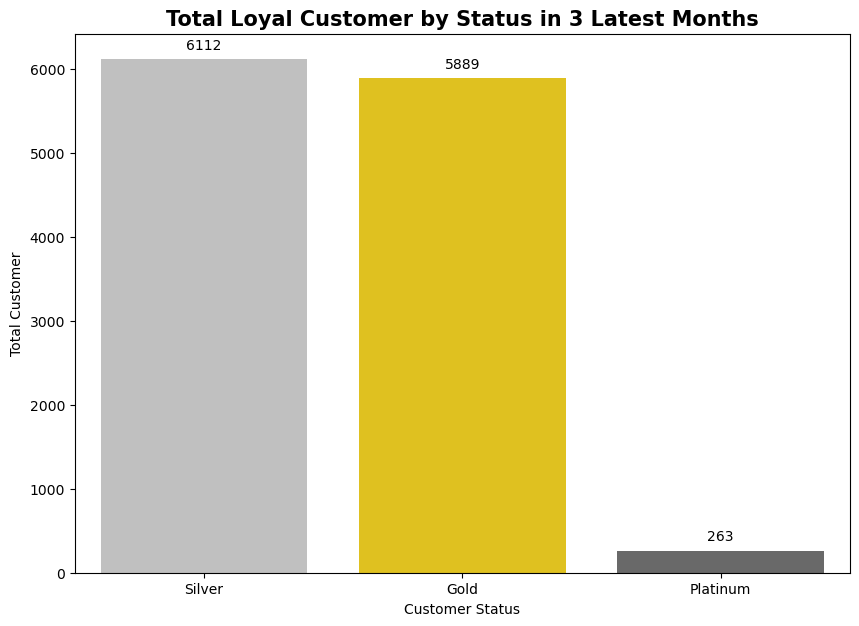

In [27]:
# Viz
plt.figure(figsize=(10,7))
ax = sns.barplot(data=loyal_customer_status.sort_values(by='total_customer', ascending=False),
                 x='customer_status',
                 y='total_customer',
                 palette=['silver', 'gold', 'dimgrey'])

# Add values on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),  # Offset for text position from the bar top
                textcoords = 'offset points')
plt.title('Total Loyal Customer by Status in 3 Latest Months', fontsize=15, weight='bold')
plt.xlabel('Customer Status')
plt.ylabel('Total Customer')
plt.show()

**Insights from Customer Status Distribution**

- **Silver Status Customers:** There are 6112 customers classified as Silver status.
- **Gold Status Customers:** There are 5889 customers classified as Gold status.
- **Platinum Status Customers:** There are 263 customers classified as Platinum status.
- **Overall Distribution:** The majority of customers fall under Silver and Gold status, with Platinum status customers being the least represented.